<a href="https://colab.research.google.com/github/matheusbrito911/Projeto-A-Tech/blob/main/projeto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Capacitação em Ciências de Dados**
Case A-Tech $-$ Projeto Final ⏰



**OBS**: os arquivos .csv já estão carregados no notebook do colab, vocês podem importar da seguinte forma: 

```
pd.read_csv('dados/nome_do_arquivo.csv')
```



In [ ]:
!ls dados

ls: cannot access 'dados': No such file or directory


In [ ]:
!pwd

/content


A partir daqui começa código do Projeto:

## Importação

### Importando pacotes

In [ ]:
!pip install pandas==1.5.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pandas==1.5.0 (from versions: 0.1, 0.2, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.5.0, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.8.0, 0.8.1, 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.21.0, 0.21.1, 0.22.0, 0.23.0, 0.23.1, 0.23.2, 0.23.3, 0.23.4, 0.24.0, 0.24.1, 0.24.2, 0.25.0, 0.25.1, 0.25.2, 0.25.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.1.4, 1.1.5, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.2.4, 1.2.5, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.3.4, 1.3.5)
ERROR: No matching distribution found for pandas==1.5.0


In [ ]:
import warnings
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
import time

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV, ParameterGrid
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb
from prophet import Prophet

In [ ]:
!pip show pandas

Name: pandas
Version: 1.3.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.7/dist-packages
Requires: python-dateutil, pytz, numpy
Required-by: xarray, vega-datasets, statsmodels, sklearn-pandas, seaborn, pymc, prophet, plotnine, pandas-profiling, pandas-gbq, pandas-datareader, mlxtend, mizani, holoviews, gspread-dataframe, google-colab, fix-yahoo-finance, fastai, datascience, cufflinks, cmdstanpy, arviz, altair


### Importando dados

In [ ]:
# Importando dados e atribuindo variáveis aos dataframes
vendas_url = 'https://drive.google.com/file/d/1OkVGrEBX0Tpu-9NEr5vHhnbZAtTeUb2Y/view?usp=sharing'
vendas_url='https://drive.google.com/uc?id=' + vendas_url.split('/')[-2]
vendas = pd.read_csv(vendas_url, parse_dates=['data'], dayfirst=True)

lojas_url = 'https://drive.google.com/file/d/1DPXlhOlM8fMUqXLk-5aP6EvopWTfM4Qi/view?usp=sharing'
lojas_url='https://drive.google.com/uc?id=' + lojas_url.split('/')[-2]
lojas = pd.read_csv(lojas_url)

outras_var_url = 'https://drive.google.com/file/d/1xABnHikKQWtLBgfPpjdVZrJXZQ1aW1hF/view?usp=sharing'
outras_var_url = 'https://drive.google.com/uc?id=' + outras_var_url.split('/')[-2]
outras_var = pd.read_csv(outras_var_url, parse_dates=['data'], dayfirst=True)

## Limpagem dos dados

### Mostrando informações básicas dos dados

In [ ]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   loja              421570 non-null  int64         
 1   departamento      421570 non-null  int64         
 2   data              421570 non-null  datetime64[ns]
 3   venda_semanal     421570 non-null  float64       
 4   semana_de_evento  421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [ ]:
vendas.head()

,loja,departamento,data,venda_semanal,semana_de_evento
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
vendas.tail()

,loja,departamento,data,venda_semanal,semana_de_evento
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [ ]:
lojas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   loja          45 non-null     int64  
 1   tipo_de_loja  45 non-null     object 
 2   tamanho       45 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
lojas.head()

,loja,tipo_de_loja,tamanho
0,1,A,97.622581
1,2,A,130.520645
2,3,B,24.123871
3,4,A,132.814839
4,5,B,22.500000


In [ ]:
outras_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   loja               8190 non-null   int64         
 1   data               8190 non-null   datetime64[ns]
 2   preco_combustivel  8190 non-null   float64       
 3   IPC                7605 non-null   float64       
 4   taxa_desemprego    7605 non-null   float64       
 5   evento             8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1)
memory usage: 328.0 KB


In [ ]:
outras_var.head()

,loja,data,preco_combustivel,IPC,taxa_desemprego,evento
0,1,2010-02-05,2.572,211.096358,8.106,False
1,1,2010-02-12,2.548,211.242170,8.106,True
2,1,2010-02-19,2.514,211.289143,8.106,False
3,1,2010-02-26,2.561,211.319643,8.106,False
4,1,2010-03-05,2.625,211.350143,8.106,False


### Juntando dataframes 'vendas' e 'outras_var' e agrupando variáveis

In [ ]:
df = pd.merge(outras_var, vendas, on=['loja', 'data']).drop('semana_de_evento', axis=1)
df = pd.merge(df, lojas)
df.head()

,loja,data,preco_combustivel,IPC,taxa_desemprego,evento,departamento,venda_semanal,tipo_de_loja,tamanho
0,1,2010-02-05,2.572,211.096358,8.106,False,1,24924.50,A,97.622581
1,1,2010-02-05,2.572,211.096358,8.106,False,2,50605.27,A,97.622581
2,1,2010-02-05,2.572,211.096358,8.106,False,3,13740.12,A,97.622581
3,1,2010-02-05,2.572,211.096358,8.106,False,4,39954.04,A,97.622581
4,1,2010-02-05,2.572,211.096358,8.106,False,5,32229.38,A,97.622581


In [ ]:
df_res = vendas.groupby('data', as_index=False)[['venda_semanal']].agg({'venda_semanal': ['sum', 'mean']})
df_res.columns = ['data', 'vendas_soma', 'vendas_media']
var_res = outras_var.drop('loja', axis=1).groupby('data', as_index=False).mean()
df_res = pd.merge(df_res, var_res, on='data')
df_res.set_index('data', inplace=True)
df_res['lag_1'] = df_res['vendas_soma'].shift(1, freq='W-FRI')
df_res['lag_4'] = df_res['vendas_soma'].shift(4, freq='W-FRI')
df_res['lag_51'] = df_res['vendas_soma'].shift(51, freq='W-FRI')
df_res['lag_52'] = df_res['vendas_soma'].shift(52, freq='W-FRI')
df_res['lag_53'] = df_res['vendas_soma'].shift(53, freq='W-FRI')
df_res['rolling_mean_4'] = df_res['vendas_soma'].rolling(window=5).mean()
df_res['rolling_mean_51'] = df_res['vendas_soma'].rolling(window=51).mean()
df_res['rolling_mean_52'] = df_res['vendas_soma'].rolling(window=52).mean()
df_res['rolling_mean_53'] = df_res['vendas_soma'].rolling(window=53).mean()
df_res['Venda/tamanho'] = df_res['vendas_media']/df['tamanho'].min()
df_res.head()

,vendas_soma,vendas_media,preco_combustivel,IPC,taxa_desemprego,evento,lag_1,lag_4,lag_51,lag_52,lag_53,rolling_mean_4,rolling_mean_51,rolling_mean_52,rolling_mean_53,Venda/tamanho
data,,,,,,,,,,,,,,,,
2010-02-05,49750740.50,16836.121997,2.717844,167.730885,8.619311,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,748.272089
2010-02-12,48336677.63,16352.056032,2.694022,167.825608,8.619311,1.0,49750740.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,726.758046
2010-02-19,48276993.78,16216.658979,2.672067,167.871686,8.619311,0.0,48336677.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720.740399
2010-02-26,43968571.13,14899.549688,2.683933,167.909657,8.619311,0.0,48276993.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,662.202208
2010-03-05,46871470.30,15921.015727,2.731200,167.947628,8.619311,0.0,43968571.13,49750740.5,NaN,NaN,NaN,4.744089e+07,NaN,NaN,NaN,707.600699


### Plot do histórico de vendas

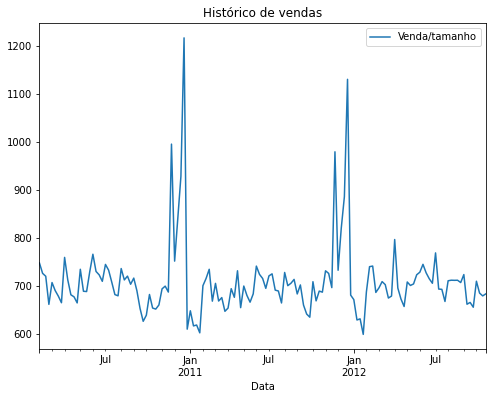

In [ ]:
fig, ax = plt.subplots()
df_res.plot(y='Venda/tamanho', figsize=(8,6), label='Venda/tamanho', ax=ax)
# df_res.plot(y='lag_52', figsize=(8,6), label='window 52', ax=ax)
ax.set(xlabel="Data",title="Histórico de vendas")
plt.savefig("HistoricoDeVendas")
plt.show()


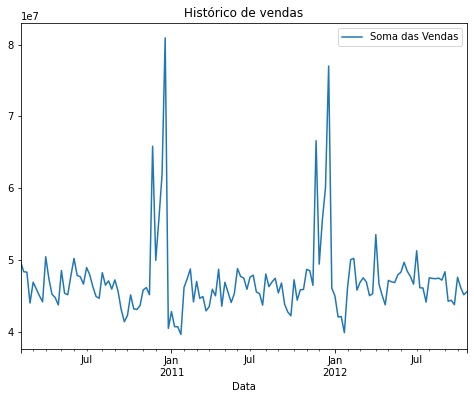

In [ ]:
fig, ax = plt.subplots()
df_res.plot(y='vendas_soma', figsize=(8,6), label='Soma das Vendas', ax=ax)
# df_res.plot(y='lag_52', figsize=(8,6), label='window 52', ax=ax)
ax.set(xlabel="Data",title="Histórico de vendas")
plt.savefig("HistoricoDeVendas")
plt.show()


In [ ]:
df_lojas = vendas.groupby(['data', 'loja'], as_index=False)[['venda_semanal']].agg({'venda_semanal': ['sum', 'mean']})
df_lojas.columns = ['data', 'loja', 'vendas_soma', 'vendas_media']
var_lojas = outras_var.groupby(['data', 'loja'], as_index=False).mean()
df_lojas = pd.merge(df_lojas, var_lojas, on=['data', 'loja'])
df_lojas = pd.merge(df_lojas, lojas, on='loja')
df_lojas = pd.concat([df_lojas.drop('tipo_de_loja', axis=1), pd.get_dummies(df_lojas['tipo_de_loja'], prefix='tipo')], axis=1)
df_lojas.head()

,data,loja,vendas_soma,vendas_media,preco_combustivel,IPC,taxa_desemprego,evento,tamanho,tipo_A,tipo_B,tipo_C
0,2010-02-05,1,1643690.90,22516.313699,2.572,211.096358,8.106,0.0,97.622581,1,0,0
1,2010-02-12,1,1641957.44,22804.964444,2.548,211.242170,8.106,1.0,97.622581,1,0,0
2,2010-02-19,1,1611968.17,22081.755753,2.514,211.289143,8.106,0.0,97.622581,1,0,0
3,2010-02-26,1,1409727.59,19579.549861,2.561,211.319643,8.106,0.0,97.622581,1,0,0
4,2010-03-05,1,1554806.68,21298.721644,2.625,211.350143,8.106,0.0,97.622581,1,0,0


## Análise Exploratória

### Plot das vendas semanais por tipo de loja

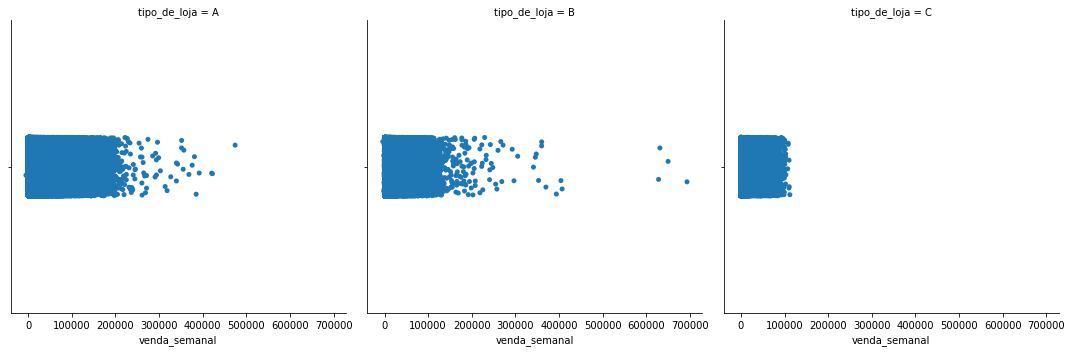

In [ ]:
_ = sns.catplot(data=df, x="venda_semanal", col="tipo_de_loja")

### Resumo por tipo de loja

In [ ]:
df.groupby('tipo_de_loja')['venda_semanal'].agg(['sum', 'mean', 'count'])

,sum,mean,count
tipo_de_loja,,,
A,4.331015e+09,20099.568043,215478
B,2.000701e+09,12237.075977,163495
C,4.055035e+08,9519.532538,42597


In [ ]:
df.groupby('tipo_de_loja')['tamanho'].agg(['sum', 'mean', 'count'])

,sum,mean,count
tipo_de_loja,,,
A,2.533344e+07,117.568571,215478
B,1.073991e+07,65.689507,163495
C,1.114000e+06,26.152081,42597


### Histórico por tipo de loja

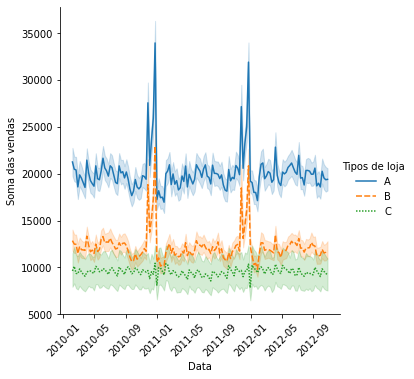

In [ ]:
ax = sns.relplot(data=df, x="data", y="venda_semanal", hue="tipo_de_loja", style="tipo_de_loja",kind="line")

for axes in ax.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
ax._legend.set_title("Tipos de loja")

ax.set_axis_labels("Data", "Soma das vendas")
ax.set_titles("Tipo de loja: {col_name} ")
 
# plt.xticks(rotation=45)

plt.savefig("HistoricoVendaTipoLoja")
plt.show()


Departamentos com mais vendas para o tipo A

In [ ]:
dep_A = df[df['tipo_de_loja']=='A'].groupby('departamento')['venda_semanal']\
                           .agg(['sum', 'mean', 'count'])\
                           .sort_values(by='sum', ascending=False).head(10)
dep_A_index = np.array(dep_A.index)
dep_A

,sum,mean,count
departamento,,,
92,3.528455e+08,112156.881662,3146
95,3.054578e+08,97094.026043,3146
90,2.219519e+08,70550.502168,3146
38,2.045058e+08,65005.018090,3146
72,1.785082e+08,62046.661710,2877
91,1.690476e+08,53734.139097,3146
40,1.687679e+08,53645.225607,3146
2,1.635752e+08,51994.674873,3146
94,1.606569e+08,51067.047111,3146


Departamentos com mais vendas para o tipo B

In [ ]:
dep_B = df[df['tipo_de_loja']=='B'].groupby('departamento')['venda_semanal']\
                           .agg(['sum', 'mean', 'count'])\
                           .sort_values(by='sum', ascending=False).head(10)
dep_B_index = np.array(dep_B.index)
dep_B

,sum,mean,count
departamento,,,
38,1.417301e+08,58301.167717,2431
72,1.271272e+08,52294.210531,2431
2,1.046594e+08,43051.996919,2431
40,1.029907e+08,42365.556516,2431
95,1.004119e+08,41304.769202,2431
92,7.893503e+07,32470.189478,2431
13,6.838739e+07,28131.381131,2431
8,6.704433e+07,27578.908420,2431
23,6.324977e+07,26018.006281,2431


Departamentos com mais vendas para o tipo C

In [ ]:
dep_C = df[df['tipo_de_loja']=='C'].groupby('departamento')['venda_semanal']\
                           .agg(['sum', 'mean', 'count'])\
                           .sort_values(by='sum', ascending=False).head(10)
dep_C_index = np.array(dep_C.index)
dep_C

,sum,mean,count
departamento,,,
92,52162761.54,60795.759371,858
38,46882211.29,54641.271900,858
95,43450462.66,50641.564872,858
90,37433022.26,43628.231072,858
94,27143838.06,31636.174895,858
91,26275291.18,30623.882494,858
93,20442952.50,23826.284965,858
40,17177474.40,20020.366434,858
96,13527249.82,15766.025431,858


Ordenando os índices

In [ ]:
np.sort((dep_A_index, dep_B_index, dep_C_index))

array([[ 2, 38, 40, 72, 90, 91, 92, 93, 94, 95],
       [ 2,  7,  8, 13, 23, 38, 40, 72, 92, 95],
       [ 2, 38, 40, 90, 91, 92, 93, 94, 95, 96]])

Top 15 departamentos com mais vendas para todos os tipos de loja

In [ ]:
top_15_dep = set(np.sort((dep_A_index, dep_B_index, dep_C_index), axis=None))





Plot da média das vendas nos top 15 departamentos com mais vendas agrupados por evento

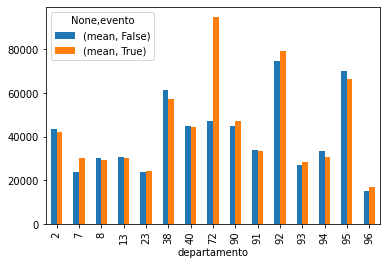

In [ ]:
  _ = df.query('departamento in @top_15_dep').groupby(['departamento', 'evento',])['venda_semanal']\
                                        .agg(['sum', 'mean'])\
                                        .unstack()\
                                        [['mean']]\
                                        .plot(kind='bar')

In [ ]:
top15TipoLoja = df.query('departamento in @top_15_dep').groupby(['departamento'])['venda_semanal']\
                                        .agg(['sum','mean'])\
                                        .sort_values(by='sum', ascending=False).head(10)

top15TipoLoja
                                       

,sum,mean
departamento,,
92,4.839433e+08,75204.870531
95,4.493202e+08,69824.423080
38,3.931181e+08,61090.619568
72,3.057252e+08,50566.515417
90,2.910685e+08,45232.084488
40,2.889360e+08,44900.702727
2,2.806112e+08,43607.020113
91,2.167817e+08,33687.910758
13,1.973216e+08,30663.802634


In [ ]:
dfTop15 = df.query('departamento in @top_15_dep')
dfTop15["Mes"] = dfTop15.data.dt.month
top15PorMes = dfTop15.groupby(['Mes','departamento'],as_index=False)['venda_semanal']\
                                        .agg(['sum','mean'])\
                                        .unstack()\
                                        [['sum']]\
                                        


top15PorMes
# top15TotalGNV = dfTop15.groupby(['departamento'])['venda_semanal']\
#                                         .agg(['sum', 'mean'])

# top15TotalGNV

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


sum                                                      \
departamento           2            7            8            13           23   
Mes                                                                             
1             14344921.31   4169208.01  10393100.58  10525868.59   5541747.46   
2             23392994.72   8971264.30  16740470.89  16611556.22  10427231.01   
3             25173486.64  10833378.97  17686208.97  17998238.25  11282852.48   
4             26969257.79  14099185.57  18826070.36  19009086.22  12310342.00   
5             23156092.00  11348449.54  16233757.95  16192413.63  11159396.64   
6             26034917.50  15759452.57  17582077.84  17841904.88  14652197.79   
7             28397971.62  14100792.35  18691438.26  19508252.30  13407586.31   
8             27340240.66  10358769.41  17368839.70  19056466.08  12615575.61   
9             25304375.48  10042065.82  17343861.88  18716693.63  10519490.92   
10            24478104.30  10769877.62  17829930.14  18210791.27  12151859.73   
11            14966064.46  13286912.51  10985161.69  10922371.47   9001159.91   
12            21052747.95  31738206.08  14599862.47  12727927.41  15110890.92   

                                                                               \
departamento           38           40           72           90           91   
Mes                                                                             
1             23462065.69  16663608.10  14381515.84  16694690.11  12613690.90   
2             34291774.71  25709794.79  34120397.95  25107329.88  19371817.74   
3             37264750.08  27465409.12  27162809.33  26184045.23  20021532.79   
4             39334002.69  28363859.87  24681784.85  27807471.41  21023500.18   
5             33557063.81  23946681.30  19802458.79  23482660.19  18120664.46   
6             34565387.21  25664282.28  22356763.64  25521783.26  19757916.95   
7             37308945.43  27233829.15  23665534.14  27469232.85  20948110.28   
8             34726382.79  25827690.68  24395331.67  26343331.59  19751727.66   
9             35006978.43  26013060.27  24210926.57  26604399.51  19403102.12   
10            35050637.93  25891386.53  23969186.02  26712683.18  19501568.85   
11            21056838.84  15628881.34  33633331.70  17339146.93  11914568.80   
12            27493309.31  20527538.62  33345111.71  21801689.54  14353505.00   

                                                                              
departamento           92           93           94           95          96  
Mes                                                                           
1             27831790.72   8794601.99   9785070.39  22951961.87  3497723.76  
2             42103944.58  13123793.86  16322032.70  35812546.73  5433868.71  
3             43473161.28  13720311.77  16787062.32  39355524.13  5965074.49  
4             45294683.16  15228662.28  19197805.96  43206312.16  6771292.85  
5             38865579.00  13464324.60  17862525.82  39229887.33  6259689.70  
6             42008931.53  15063350.51  18834208.63  44924006.91  7555383.68  
7             44742123.92  16068691.42  19898154.61  47772762.82  8371588.94  
8             43561987.57  14485911.64  17848401.87  43720377.27  7112691.98  
9             43731250.78  14555816.47  16492964.13  41177437.77  6814725.34  
10            44845671.03  14158113.19  16142046.75  39330461.66  6540328.61  
11            30824857.40   9836399.26   9525476.57  23050624.32  4199086.77  
12            36659360.90  11198686.20  11216700.58  28788259.55  5312461.33

Média das vendas agrupando por lojas e eventos

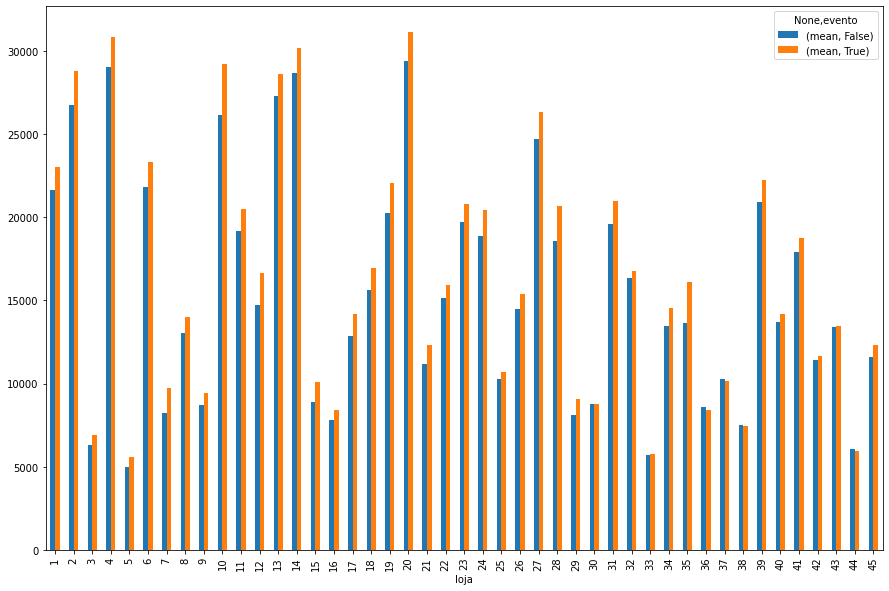

In [ ]:
_ = df.groupby(['loja', 'evento'])['venda_semanal'].agg(['sum', 'mean']).unstack()[['mean']].plot(kind='bar', figsize=(15,10))

Média das vendas agrupando por departamento e evento

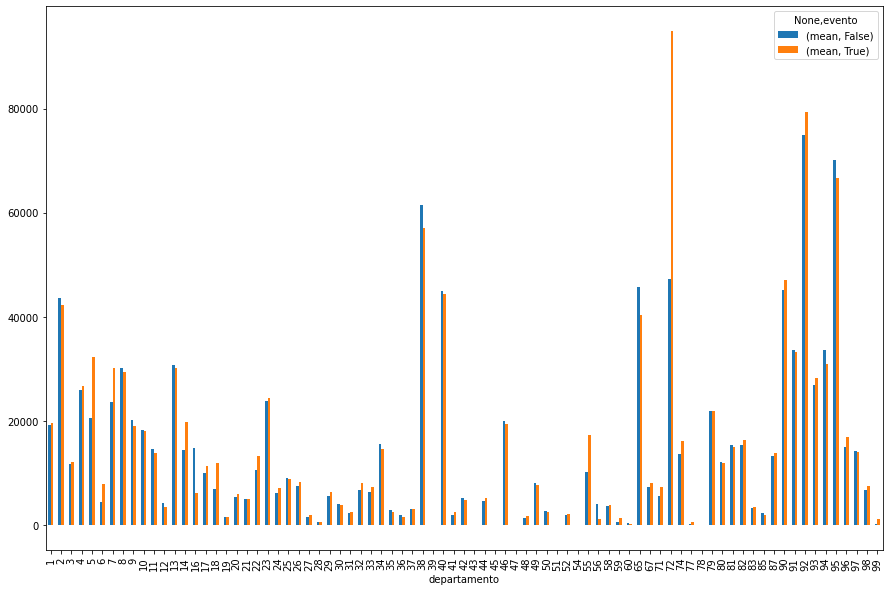

In [ ]:
_ = df.groupby(['departamento', 'evento'])['venda_semanal'].agg(['sum', 'mean']).unstack()[['mean']].plot(kind='bar', figsize=(15,10))

Definindo as váriaveis numéricas

In [ ]:
var = ['preco_combustivel', 'IPC', 'taxa_desemprego', 'venda_semanal', 'tamanho', 'tipo_de_loja']

### Plot do heatmap

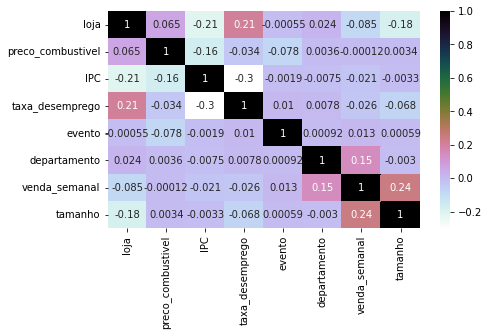

In [ ]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')
plt.savefig("HeatMapCorr")
plt.show()

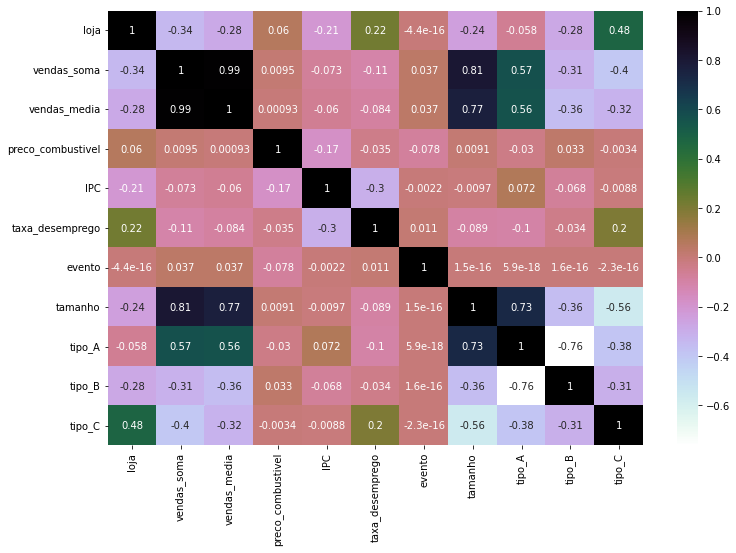

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df_lojas.corr(),annot=True,cmap='cubehelix_r')
plt.show()

Principais correlações encontradas:
*  Venda Semanal e Tamanho
*  Venda Semanal e Departamento
*  Loja e taxa desemprego


### Boxplot dos dados do 'df'

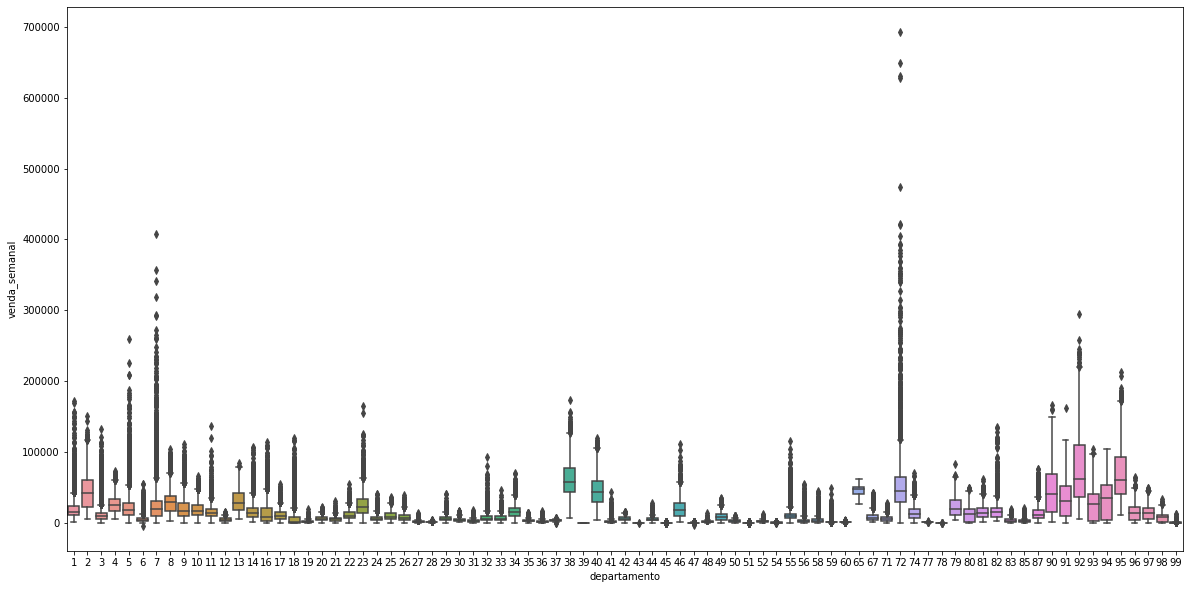

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="departamento", y="venda_semanal", data=df)
plt.show()

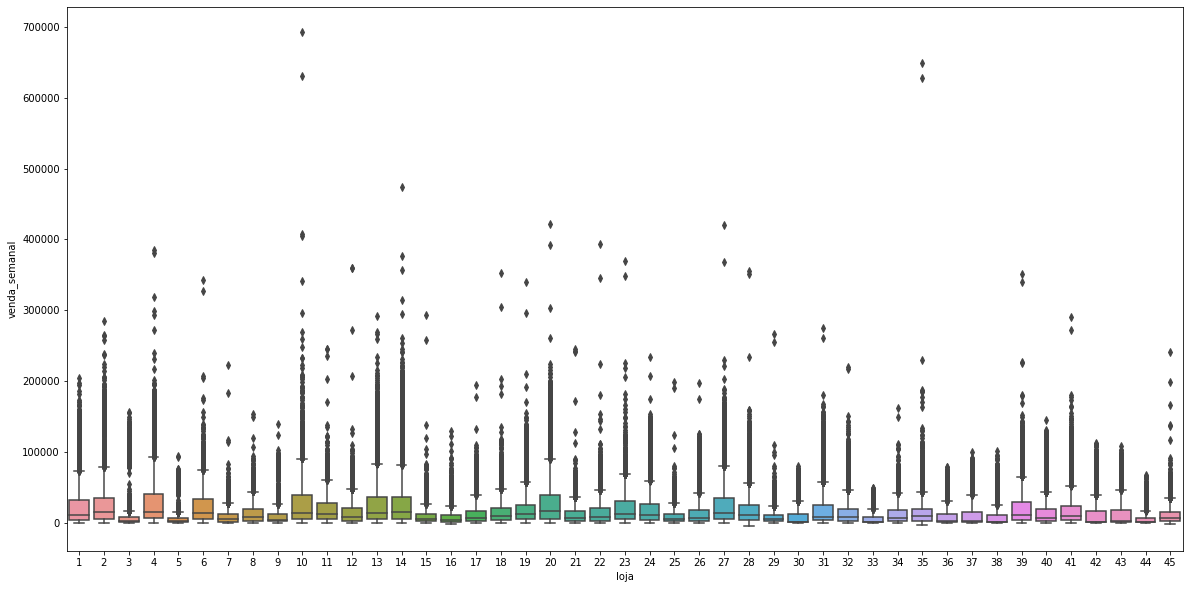

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="loja", y="venda_semanal", data=df)
plt.show()

### utilizando seasonal_decompose

In [ ]:
df_res_ts = df_res[['vendas_soma']]
decomposition = seasonal_decompose(df_res_ts, model='multiplicative')  

# Definição dos componentes
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

### Plots dos componentes

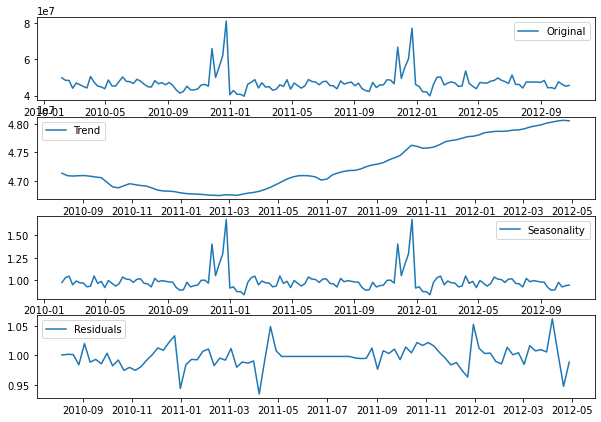

In [ ]:
plt.subplots(figsize=(10, 7))
plt.subplot(411)
plt.plot(df_res_ts, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.show()

## Engenharia de Variáveis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   loja               421570 non-null  int64         
 1   data               421570 non-null  datetime64[ns]
 2   preco_combustivel  421570 non-null  float64       
 3   IPC                421570 non-null  float64       
 4   taxa_desemprego    421570 non-null  float64       
 5   evento             421570 non-null  bool          
 6   departamento       421570 non-null  int64         
 7   venda_semanal      421570 non-null  float64       
 8   tipo_de_loja       421570 non-null  object        
 9   tamanho            421570 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 48.7+ MB


### Get Features

#### Definindo a função

In [ ]:
def get_features(df):
  aux = pd.DataFrame(columns=df.columns).drop('data', axis=1)
  for loja in df['loja'].unique():
    aux2 = df[df['loja']==loja].copy()
    aux2.set_index('data', inplace=True)
    aux2['lag_1'] = aux2['vendas_soma'].shift(1, freq='W-FRI')
    aux2['lag_4'] = aux2['vendas_soma'].shift(4, freq='W-FRI')
    aux2['lag_51'] = aux2['vendas_soma'].shift(51, freq='W-FRI')
    aux2['lag_52'] = aux2['vendas_soma'].shift(52, freq='W-FRI')
    aux2['lag_53'] = aux2['vendas_soma'].shift(53, freq='W-FRI')
    aux2['rolling_mean_4'] = aux2['vendas_soma'].rolling(window=4, closed='left').mean()
    aux2['rolling_mean_51'] = aux2['vendas_soma'].rolling(window=51, closed='left').mean()
    aux2['rolling_mean_52'] = aux2['vendas_soma'].rolling(window=52, closed='left').mean()
    aux2['rolling_mean_53'] = aux2['vendas_soma'].rolling(window=53, closed='left').mean()
    aux2
    aux = pd.concat([aux,aux2])
  return aux

#### Organizando features do dataframe

In [ ]:
df_lojas_ml = get_features(df=df_lojas).dropna()
df.sort_values(['data', 'loja', 'departamento'], inplace=True)
df.duplicated(['data', 'loja', 'departamento']).sum()

0

#### Plot da série temporal da loja e departamento

In [ ]:
from IPython.display import display
from ipywidgets import interact, IntSlider

def plot_serie(loja, dep):
    plot_filter = df[(df['loja']==loja) & (df['departamento']==dep)]

    fig, ax = plt.subplots(figsize=(10,3))
    ax.plot(plot_filter['data'],plot_filter['venda_semanal'])

    plt.show()
# Criando o Slider interativo
_ = interact(plot_serie,
             loja=IntSlider(min=df.loja.min(), max=df.loja.max(), step = 1, value = 22),
             dep =IntSlider(min=df.departamento.min(), max=df.departamento.max(), step = 1, value = 50)
             )

interactive(children=(IntSlider(value=22, description='loja', max=45, min=1), IntSlider(value=50, description=…

## Modelos de Machine Learning

#### Random Forest

In [ ]:
def random_forest(X, y):
  X_training, X_test, y_training, y_test = train_test_split(X, y,
                                                          test_size=0.4, 
                                                          shuffle=False)
  cv = TimeSeriesSplit(n_splits=5)

  params = {'n_estimators': [100, 500, 1000],
          'max_depth': [2, 5, 10]}

  rf_model_cv_gs = RandomForestRegressor(random_state=42)

  # Crie o objeto para grid search
  grid_search = GridSearchCV(rf_model_cv_gs,
                            param_grid=params, 
                            return_train_score=True,
                            scoring='r2',
                            cv=cv)

  # Treine o modelo com Grid Search
  grid_search.fit(X_training, y_training)

  # Estruture em um DataFrame os resultados da validação cruzada (cv_results)
  cv_results = pd.DataFrame(grid_search.cv_results_)

  # Armazene a melhor combinação de hiperparâmetros
  cv_best_params = grid_search.best_params_
  print('Best hyperparameters:')
  print(cv_best_params)

  train_score = cv_results[cv_results.rank_test_score == 1].mean_train_score.values[0]
  test_score = cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0]

  # Imprimindo o score médio nos conjuntos de treino
  print("Pontuação média nos dados de treino: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_train_score.values[0],
                                                                      cv_results[cv_results.rank_test_score == 1].std_train_score.values[0]))
  # Imprimindo o score médio nos conjuntos de validação
  print("Pontuação média nos dados de validação: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0],
                                                                      cv_results[cv_results.rank_test_score == 1].std_test_score.values[0]))

  # Configure o modelo com a melhor combinação de hiperparâmetros
  rf_model_cv_gs.set_params(n_estimators = cv_best_params['n_estimators'],
                          max_depth = cv_best_params['max_depth'],
                          )

  # Treine um modelo com a melhor combinação de hiperparâmetros (3 pt)
  rf_model_cv_gs.fit(X_training, y_training)
  best_model_params = rf_model_cv_gs.get_params()

  return rf_model_cv_gs, cv_best_params, train_score, test_score

#### Light LGB

In [ ]:
def light_lgb(X, y):
  X_training, X_test, y_training, y_test = train_test_split(X, y,
                                                          test_size=0.4, 
                                                          shuffle=False)
  cv = TimeSeriesSplit(n_splits=5)

  params = {'learning_rate': [0.01, 0.025, 0.05, 0.1, 0.2],
            'n_estimators': [10, 50, 100, 200, 500]}

  lgb_model_cv_gs = lgb.LGBMRegressor(random_state=42)

  # Crie o objeto para grid search
  grid_search = GridSearchCV(lgb_model_cv_gs,
                            param_grid=params, 
                            return_train_score=True,
                            scoring='r2',
                            cv=cv)

  # Treine o modelo com Grid Search
  grid_search.fit(X_training, y_training)

  # Estruture em um DataFrame os resultados da validação cruzada (cv_results)
  cv_results = pd.DataFrame(grid_search.cv_results_)

  # Armazene a melhor combinação de hiperparâmetros
  cv_best_params = grid_search.best_params_
  print('Best hyperparameters:')
  print(cv_best_params)

  train_score = cv_results[cv_results.rank_test_score == 1].mean_train_score.values[0]
  test_score = cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0]

  # Imprimindo o score médio nos conjuntos de treino
  print("Pontuação média nos dados de treino: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_train_score.values[0],
                                                                      cv_results[cv_results.rank_test_score == 1].std_train_score.values[0]))
  # Imprimindo o score médio nos conjuntos de validação
  print("Pontuação média nos dados de validação: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0],
                                                                      cv_results[cv_results.rank_test_score == 1].std_test_score.values[0]))

  # Configure o modelo com a melhor combinação de hiperparâmetros
  lgb_model_cv_gs.set_params(learning_rate = cv_best_params['learning_rate'],
                            n_estimators = cv_best_params['n_estimators'],
                            )
  # Treine um modelo com a melhor combinação de hiperparâmetros (3 pt)
  lgb_model_cv_gs.fit(X_training, y_training)
  best_model_params = lgb_model_cv_gs.get_params()

  return lgb_model_cv_gs, cv_best_params, train_score, test_score

#### XGBoost

In [ ]:
!pip install -q xgboost

def xg_boost(X, y):

  X_training, X_test, y_training, y_test = train_test_split(X, y,
                                                          test_size=0.4, 
                                                          shuffle=False)
  cv = TimeSeriesSplit(n_splits=5)

  params = {'learning_rate': [0.1, 0.2, 0.3],
            'alpha': [5, 10, 15],
            'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 1.0],
            'max_depth': [3, 4, 5]}

  xgb_model_cv_gs = xgb.XGBRegressor(objective='reg:squarederror', random_state=42,
                                     sampling_method = 'gradient_based',
                                    #  tree_method = 'gpu_hist',
                                     use_label_encoder=False)

  # Crie o objeto para grid search
  grid_search = GridSearchCV(xgb_model_cv_gs,
                            param_grid=params, 
                            return_train_score=True,
                            cv=cv)

  # Treine o modelo com Grid Search
  grid_search.fit(X_training, y_training)

  # Estruture em um DataFrame os resultados da validação cruzada (cv_results)
  cv_results = pd.DataFrame(grid_search.cv_results_)

  # Armazene a melhor combinação de hiperparâmetros
  cv_best_params = grid_search.best_params_
  print('Best hyperparameters:')
  print(cv_best_params)

  train_score = cv_results[cv_results.rank_test_score == 1].mean_train_score.values[0]
  test_score = cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0]

  # Imprimindo o score médio nos conjuntos de treino
  print("Pontuação média nos dados de treino: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_train_score.values[0],
                                                                      cv_results[cv_results.rank_test_score == 1].std_train_score.values[0]))
  # Imprimindo o score médio nos conjuntos de validação
  print("Pontuação média nos dados de validação: {:.3f} +/- {:.3f}".format(cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0],
                                                                      cv_results[cv_results.rank_test_score == 1].std_test_score.values[0]))

  # Configure o modelo com a melhor combinação de hiperparâmetros
  xgb_model_cv_gs.set_params(learning_rate = cv_best_params['learning_rate'],
                             alpha = cv_best_params['alpha'],
                             colsample_bytree = cv_best_params['colsample_bytree'],
                             max_depth = cv_best_params['max_depth']
                            )
  # Treine um modelo com a melhor combinação de hiperparâmetros (3 pt)
  xgb_model_cv_gs.fit(X_training, y_training)
  best_model_params = xgb_model_cv_gs.get_params()

  return xgb_model_cv_gs, cv_best_params, train_score, test_score


#### Função de Plot da importância dos features

In [ ]:
def plot_feature_importances(model, X):
    # Gráfico de barras horizontal a partir da importância de cada features
    if str(type(model)) in ("<class 'sklearn.tree._classes.DecisionTreeClassifier'>", 
                            "<class 'xgboost.sklearn.XGBClassifier'>",
                            "<class 'sklearn.ensemble._forest.RandomForestRegressor'>"):
      feat_importances = pd.Series(model.feature_importances_, index=X.columns)
      plt.figure(figsize=(7,5))
      ax = feat_importances.nlargest(10).plot(kind='barh', align='center', label='Importance')
      ax.invert_yaxis()
      # Adiciona o ticks, ou traços no eixo Y
      plt.xlabel("Feature importance")
      plt.ylabel("Feature")
      plt.legend()
    elif str(type(model)) == "<class 'sklearn.linear_model._logistic.LogisticRegression'>":
      feat_importances = pd.Series(model.coef_[0], index=X.columns)
      plt.figure(figsize=(7,5))
      ax = feat_importances.nlargest(10).plot(kind='barh', align='center', label='Importance')
      ax.invert_yaxis()
      # Adiciona o ticks, ou traços no eixo Y
      plt.xlabel("Feature importance")
      plt.ylabel("Feature")
      plt.legend()

### Funções de Time Series

#### Grid

In [ ]:
def get_params():
  params_grid = {'seasonality_mode':('multiplicative','additive'),
                'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
                'holidays_prior_scale':[0.1,0.2,0.3,0.4,0.5],
                'n_changepoints' : [100,150,200]}
  grid = ParameterGrid(params_grid)
  return grid

#### Holidays

In [ ]:
def get_holidays():
  holiday = df[df['evento']==1][['data', 'evento']]
  holiday['evento'] = 'evento'
  holiday.columns = ['ds', 'holiday']
  holiday['lower_window'] = -7
  holiday['upper_window'] = 7
  return holiday

### Funções KMeans

#### KMeans

### Geral

In [ ]:
df_ml = df_res.copy()
df_ml = df_ml.dropna()
X_res = df_ml.drop(['vendas_soma', 'vendas_media'], axis=1)
# X_res = df_ml[['lag_52', 'rolling_mean_53', 'lag_1', 'preco_combustivel']]
y_res = df_ml['vendas_soma']

#### Machine Learning

In [ ]:
rf_res, rf_res_bp, rf_res_train_score, rf_res_test_score = random_forest(X_res, y_res)

Best hyperparameters:
{'max_depth': 10, 'n_estimators': 100}
Pontuação média nos dados de treino: 0.901 +/- 0.034
Pontuação média nos dados de validação: -0.003 +/- 0.557


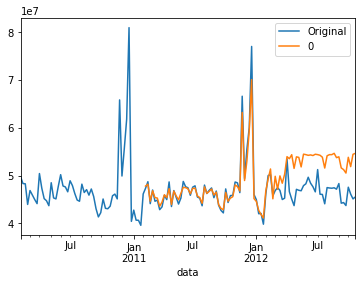

In [ ]:
fig, ax = plt.subplots()
df_res.plot(y='vendas_soma', label='Original', ax=ax)
pd.DataFrame(rf_res.predict(X_res), index=X_res.index).plot(label='predicted', ax=ax)
ax.legend(['Original', 'Predição'])
plt.show()

In [ ]:
lgbm_res, lgbm_res_bp, lgbm_res_train_score, lgbm_res_test_score = light_lgb(X_res, y_res) 

Best hyperparameters:
{'learning_rate': 0.1, 'n_estimators': 500}
Pontuação média nos dados de treino: 0.127 +/- 0.253
Pontuação média nos dados de validação: -0.212 +/- 0.325


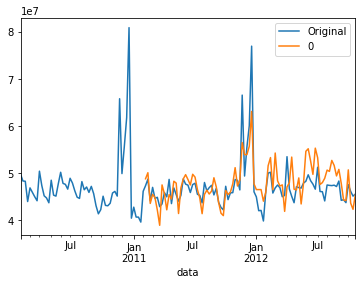

In [ ]:
fig, ax = plt.subplots()
df_res.plot(y='vendas_soma', label='Original', ax=ax)
pd.DataFrame(lgbm_res.predict(X_res), index=X_res.index).plot(label='predicted', ax=ax)
plt.show()

In [ ]:
xgb_res, xgb_res_bp, xgb_res_train_score, xgb_res_test_score = xg_boost(X_res, y_res) 

Best hyperparameters:
{'alpha': 5, 'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 3}
Pontuação média nos dados de treino: 1.000 +/- 0.000
Pontuação média nos dados de validação: 0.091 +/- 0.376


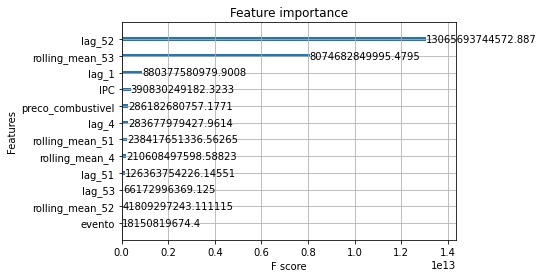

In [ ]:
__ = xgb.plot_importance(xgb_res, importance_type='gain')

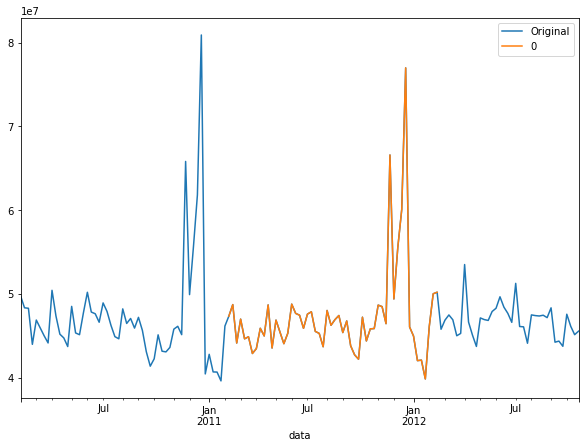

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
df_res.plot(y='vendas_soma', label='Original', ax=ax)
X_training, X_test, y_training, y_test = train_test_split(X_res, y_res,
                                                          test_size=0.4, shuffle=False)
pd.DataFrame(xgb_res.predict(X_training), index=X_training.index).plot(label='predicted', ax=ax)
plt.show()

#### Time Series

In [ ]:
df_res_ts_training, df_res_ts_test = train_test_split(df_res_ts, 
                                      test_size = 0.25, 
                                      shuffle = False)

In [ ]:
# fit do modelo
ar_model = SARIMAX(df_res_ts_training, order=(2,0,0), # especificando a ordem do ARIMA: order=(p, d, q)
                   seasonal_order = (0,1,0,12), # especificando a ordem sazonal : order=(p, d, q)
                   trend = 't', 
                   freq = df_res_ts_training.index.inferred_freq)  # especificando a tendência do gráfico
ar_fit = ar_model.fit(freq = df_res_ts_training.index.inferred_freq)

# previsão
ar_yhat_vendas = ar_fit.predict(df_res_ts_test.index[0], df_res_ts_test.index[-1], typ='levels')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [ ]:
from prophet import Prophet
m = Prophet()
present = df_res_ts_training.reset_index()
present.columns = ['ds', 'y']
m.fit(present)
future = m.make_future_dataframe(periods=len(df_res_ts_test), freq='W-FRI')
forecast = m.predict(future)
forecast[['ds', 'trend', 'yhat','yhat_lower', 'yhat_upper']]

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1u6prd1/84umrz2j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1u6prd1/meoevmho.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88214', 'data', 'file=/tmp/tmpd1u6prd1/84umrz2j.json', 'init=/tmp/tmpd1u6prd1/meoevmho.json', 'output', 'file=/tmp/tmpd1u6prd1/prophet_modelgih_cte_/prophet_model-20221008042713.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:27:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:27:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat,yhat_lower,yhat_upper
0,2010-02-05,4.709189e+07,4.804486e+07,4.308136e+07,5.308302e+07
1,2010-02-12,4.709299e+07,4.869066e+07,4.367323e+07,5.390061e+07
2,2010-02-19,4.709409e+07,4.716320e+07,4.246329e+07,5.224728e+07
3,2010-02-26,4.709519e+07,4.586172e+07,4.079878e+07,5.070182e+07
4,2010-03-05,4.709629e+07,4.559920e+07,4.063357e+07,5.071616e+07
...,...,...,...,...,...
138,2012-09-28,4.746935e+07,4.329932e+07,3.806970e+07,4.851138e+07
139,2012-10-05,4.747298e+07,4.478351e+07,3.993537e+07,4.963607e+07
140,2012-10-12,4.747661e+07,4.526470e+07,4.007012e+07,5.009781e+07
141,2012-10-19,4.748024e+07,4.452385e+07,3.952728e+07,5.023050e+07


In [ ]:
forecast = forecast[['ds', 'trend', 'yhat','yhat_lower', 'yhat_upper']].join(
    df_res_ts.reset_index().drop('data', axis=1))

forecast.tail()

,ds,trend,yhat,yhat_lower,yhat_upper,vendas_soma
138,2012-09-28,4.746935e+07,4.329932e+07,3.806970e+07,4.851138e+07,43734899.40
139,2012-10-05,4.747298e+07,4.478351e+07,3.993537e+07,4.963607e+07,47566639.31
140,2012-10-12,4.747661e+07,4.526470e+07,4.007012e+07,5.009781e+07,46128514.25
141,2012-10-19,4.748024e+07,4.452385e+07,3.952728e+07,5.023050e+07,45122410.57
142,2012-10-26,4.748387e+07,4.418381e+07,3.902404e+07,4.904056e+07,45544116.29


In [ ]:
r2_score(forecast[-len(df_res_ts_test):]['vendas_soma'],
         forecast[-len(df_res_ts_test):]['yhat'])

0.0929760344861974

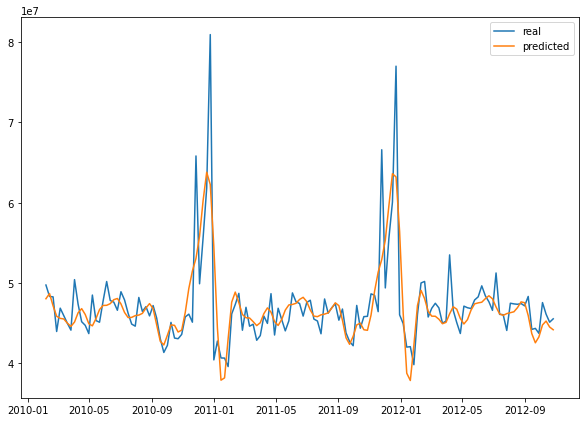

In [ ]:
fig, ax = plt.subplots(sharey=True, figsize=(10,7))

ax.plot(forecast['ds'], forecast['vendas_soma'], label='real') 
ax.plot(forecast['ds'], forecast['yhat'], label='predicted') 
ax.legend()
plt.show()

In [ ]:
# print(len(df_res_ts_training), df_res_ts_training.index.min(), df_res_ts_training.index.max())
# print(len(df_res_ts_test), df_res_ts_test.index.min(), df_res_ts_test.index.max())
# print(len(forecast) - len(df_res_ts_training), forecast[-36:]['ds'].min(), forecast['ds'].max())

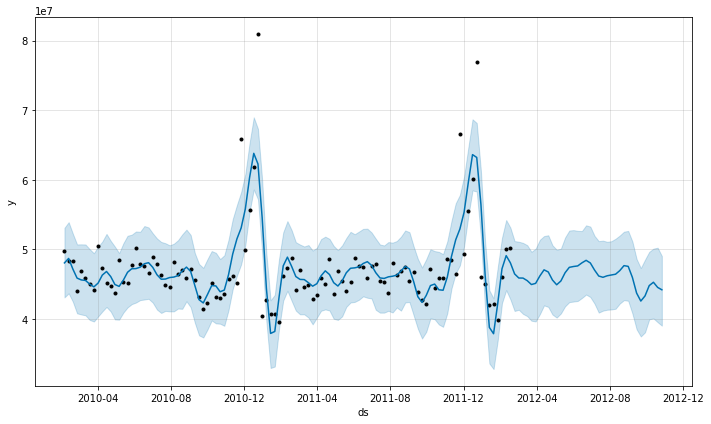

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
# Utilizando a coluna de eventos no modelo
holidays = get_holidays()
m = Prophet(holidays=holidays,
            holidays_prior_scale = 0.05,
            yearly_seasonality=True,
            weekly_seasonality=False, 
            daily_seasonality=False,
            )

m.add_seasonality(
      name='monthly', 
      period=30.5, 
      fourier_order=5
  )

present = df_res_ts_training.reset_index()
present.columns = ['ds', 'y']
m.fit(present)
future = m.make_future_dataframe(periods=len(df_res_ts_test), freq='W-FRI')
forecast = m.predict(future)
forecast[['ds', 'trend', 'yhat','yhat_lower', 'yhat_upper']]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1u6prd1/3c6lko8k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1u6prd1/6gailadc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99512', 'data', 'file=/tmp/tmpd1u6prd1/3c6lko8k.json', 'init=/tmp/tmpd1u6prd1/6gailadc.json', 'output', 'file=/tmp/tmpd1u6prd1/prophet_model2n4662yd/prophet_model-20221008042802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:28:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:28:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat,yhat_lower,yhat_upper
0,2010-02-05,4.623693e+07,4.878605e+07,4.450516e+07,5.330851e+07
1,2010-02-12,4.623472e+07,4.887991e+07,4.422544e+07,5.297924e+07
2,2010-02-19,4.623252e+07,4.765609e+07,4.314121e+07,5.217886e+07
3,2010-02-26,4.623032e+07,4.492810e+07,4.053172e+07,4.969126e+07
4,2010-03-05,4.622812e+07,4.711926e+07,4.274454e+07,5.140621e+07
...,...,...,...,...,...
138,2012-09-28,4.669958e+07,4.427141e+07,3.985698e+07,4.936040e+07
139,2012-10-05,4.670637e+07,4.653857e+07,4.183346e+07,5.065113e+07
140,2012-10-12,4.671315e+07,4.495696e+07,4.041529e+07,4.959661e+07
141,2012-10-19,4.671994e+07,4.413352e+07,4.002980e+07,4.874846e+07


In [ ]:
forecast = forecast[['ds', 'trend', 'yhat','yhat_lower', 'yhat_upper']].join(
    df_res_ts.reset_index().drop('data', axis=1))

forecast.tail()

,ds,trend,yhat,yhat_lower,yhat_upper,vendas_soma
138,2012-09-28,4.669958e+07,4.427141e+07,3.985698e+07,4.936040e+07,43734899.40
139,2012-10-05,4.670637e+07,4.653857e+07,4.183346e+07,5.065113e+07,47566639.31
140,2012-10-12,4.671315e+07,4.495696e+07,4.041529e+07,4.959661e+07,46128514.25
141,2012-10-19,4.671994e+07,4.413352e+07,4.002980e+07,4.874846e+07,45122410.57
142,2012-10-26,4.672673e+07,4.840008e+07,4.376088e+07,5.298149e+07,45544116.29


In [ ]:
r2_score(forecast[-len(df_res_ts_test):]['vendas_soma'],
         forecast[-len(df_res_ts_test):]['yhat']) 

-0.4082713937181164

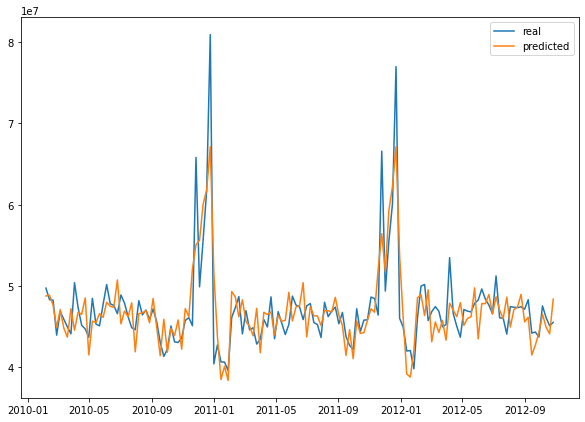

In [ ]:
fig, ax = plt.subplots(sharey=True, figsize=(10,7))

ax.plot(forecast['ds'], forecast['vendas_soma'], label='real') 
ax.plot(forecast['ds'], forecast['yhat'], label='predicted') 
ax.legend()
plt.show()

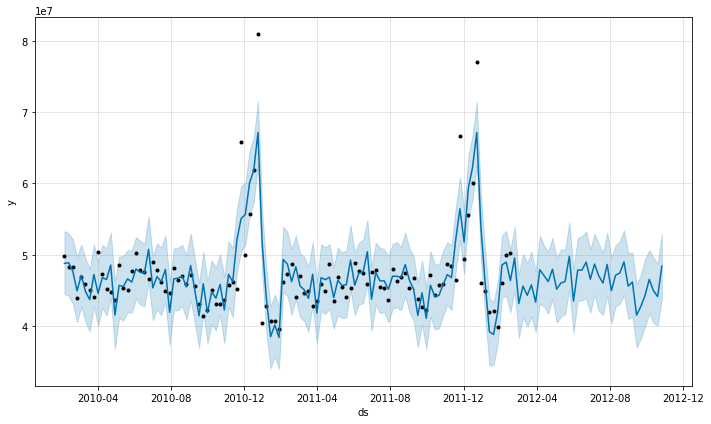

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
m = Prophet()
present = df_res_ts.reset_index()
present.columns = ['ds', 'y']
m.fit(present)
future = m.make_future_dataframe(periods=25, freq='W-FRI')
forecast = m.predict(future)
forecast.head()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1u6prd1/sxqy0_w0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1u6prd1/xa2vvdma.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=946', 'data', 'file=/tmp/tmpd1u6prd1/sxqy0_w0.json', 'init=/tmp/tmpd1u6prd1/xa2vvdma.json', 'output', 'file=/tmp/tmpd1u6prd1/prophet_model6ti48kpj/prophet_model-20221008042937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:29:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:29:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,4.703184e+07,4.335514e+07,5.216747e+07,4.703184e+07,4.703184e+07,7.092571e+05,7.092571e+05,7.092571e+05,7.092571e+05,7.092571e+05,7.092571e+05,0.0,0.0,0.0,4.774109e+07
1,2010-02-12,4.703320e+07,4.435295e+07,5.296153e+07,4.703320e+07,4.703320e+07,1.426243e+06,1.426243e+06,1.426243e+06,1.426243e+06,1.426243e+06,1.426243e+06,0.0,0.0,0.0,4.845944e+07
2,2010-02-19,4.703457e+07,4.281959e+07,5.147525e+07,4.703457e+07,4.703457e+07,4.985145e+04,4.985145e+04,4.985145e+04,4.985145e+04,4.985145e+04,4.985145e+04,0.0,0.0,0.0,4.708442e+07
3,2010-02-26,4.703593e+07,4.169039e+07,5.041085e+07,4.703593e+07,4.703593e+07,-1.165592e+06,-1.165592e+06,-1.165592e+06,-1.165592e+06,-1.165592e+06,-1.165592e+06,0.0,0.0,0.0,4.587034e+07
4,2010-03-05,4.703730e+07,4.114223e+07,5.041287e+07,4.703730e+07,4.703730e+07,-1.442220e+06,-1.442220e+06,-1.442220e+06,-1.442220e+06,-1.442220e+06,-1.442220e+06,0.0,0.0,0.0,4.559508e+07


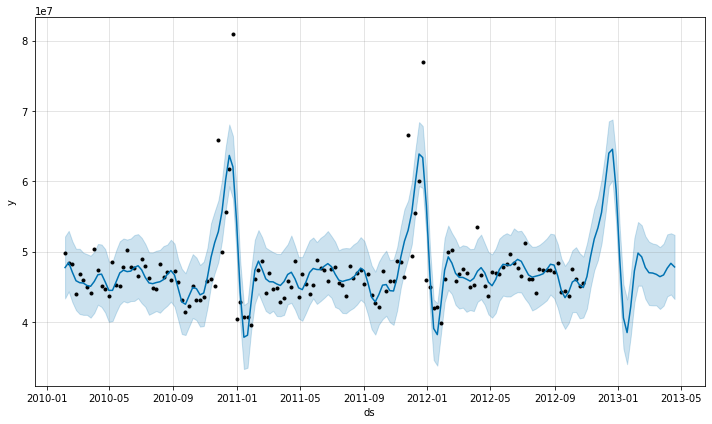

In [ ]:
fig1 = m.plot(forecast)

### Lojas

In [ ]:
df_lojas.head()

,data,loja,vendas_soma,vendas_media,preco_combustivel,IPC,taxa_desemprego,evento,tamanho,tipo_A,tipo_B,tipo_C
0,2010-02-05,1,1643690.90,22516.313699,2.572,211.096358,8.106,0.0,97.622581,1,0,0
1,2010-02-12,1,1641957.44,22804.964444,2.548,211.242170,8.106,1.0,97.622581,1,0,0
2,2010-02-19,1,1611968.17,22081.755753,2.514,211.289143,8.106,0.0,97.622581,1,0,0
3,2010-02-26,1,1409727.59,19579.549861,2.561,211.319643,8.106,0.0,97.622581,1,0,0
4,2010-03-05,1,1554806.68,21298.721644,2.625,211.350143,8.106,0.0,97.622581,1,0,0


In [ ]:
def serie_temp(df, n_loja):
  '''
  Gera um modelo de série temporal com o Prophet
  '''

  df1 = df[df['loja']==n_loja]
  df1 = df1[['data', 'vendas_soma', 'evento']].reset_index(drop=True)
  training, test = train_test_split(df1, shuffle=False)
  training = training.drop('evento', axis=1)
  test = test.drop('evento', axis=1)

  # Utilizando a coluna de eventos no modelo
  holidays = get_holidays()

  # # Construindo o modelo
  m = Prophet(holidays=holidays,
              holidays_prior_scale = 0.05,
              yearly_seasonality=True,
              weekly_seasonality=False, 
              daily_seasonality=False,
              )
  
  m.add_seasonality(
        name='monthly', 
        period=30.5, 
        fourier_order=5
    )
  
  training.columns = ['ds', 'y']
  m.fit(training)
  future = m.make_future_dataframe(periods=len(test), freq='W-FRI')
  forecast = m.predict(future)
  forecast = forecast[['ds', 'trend', 'yhat','yhat_lower', 'yhat_upper']].join(
      df1.drop(['data', 'evento'], axis=1))

  # Calcula o r2_score
  print('\n')
  r2 = r2_score(forecast[-len(test):]['vendas_soma'],
           forecast[-len(test):]['yhat'])
  print(f'R2 Score: {r2}\n')

  # Visualização
  fig, ax = plt.subplots(sharey=True, figsize=(10,7))
  ax.plot(forecast['ds'], forecast['vendas_soma'], label='real') 
  ax.plot(forecast['ds'], forecast['yhat'], label='predicted') 
  ax.axvline(test['data'].min(), c='r', linestyle='--', label='train test split')
  ax.legend()

  # Visualização - Prophet
  fig1 = m.plot(forecast)
  plt.show()

  return m, forecast

DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1u6prd1/hp7r1r55.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1u6prd1/vhx2hc23.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19053', 'data', 'file=/tmp/tmpd1u6prd1/hp7r1r55.json', 'init=/tmp/tmpd1u6prd1/vhx2hc23.json', 'output', 'file=/tmp/tmpd1u6prd1/prophet_modeludygrilc/prophet_model-20221008043030.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:30:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:30:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing




R2 Score: 0.15251841278089884



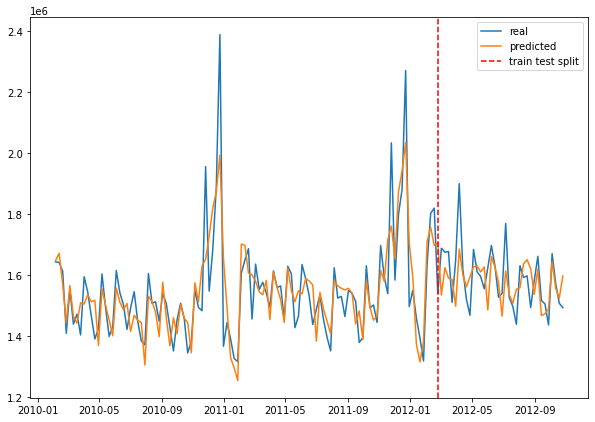

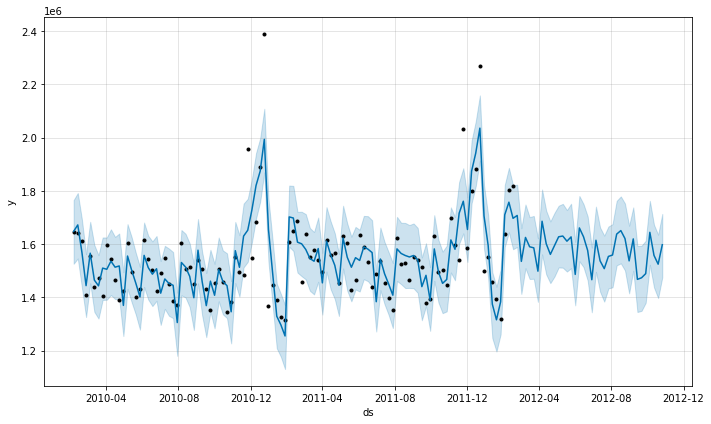

In [ ]:
m, forecast = serie_temp(df_lojas, 1)

In [ ]:
X_lojas = df_lojas_ml.drop(['vendas_soma', 'vendas_media'], axis=1)
y_lojas = df_lojas_ml['vendas_soma']

In [ ]:
rf_lojas, bp_lojas, rf_lojas_train_score, rf_lojas_test_score = random_forest(X_lojas, y_lojas)

Best hyperparameters:
{'max_depth': 10, 'n_estimators': 1000}
Pontuação média nos dados de treino: 0.998 +/- 0.001
Pontuação média nos dados de validação: 0.950 +/- 0.010


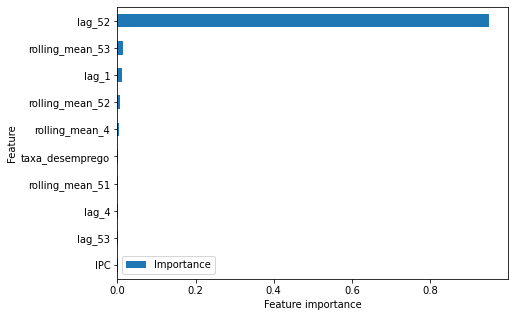

In [ ]:
plot_feature_importances(rf_lojas, X_lojas)

In [ ]:
# modelos_rf_por_loja = {}
# for loja in df_lojas['loja'].unique():
#   # print(loja)
#   df_loja = df_lojas[df_lojas['loja']==loja]
#   X_loja = df_loja.drop(['data', 'vendas_soma', 'vendas_media'], axis=1)
#   y_loja = df_loja['vendas_soma']
#   rf_loja, bp_loja, train_score_loja, test_score_loja = random_forest(X_loja, y_loja)
#   aux = {'model': rf_loja, 'best_params': bp_loja, 'train_score': train_score_loja, 'test_score': test_score_loja}
#   modelos_rf_por_loja[loja] = aux

### Lojas e Departamentos

In [ ]:
# df_1 = pd.concat([df.drop('tipo_de_loja', axis=1), pd.get_dummies(df['tipo_de_loja'], prefix='tipo')], axis=1)
# X_1 = df_1.drop(['data', 'venda_semanal'], axis=1)
# y_1 = df_1['venda_semanal']
# # Best hyperparameters:
# # {'max_depth': 10, 'n_estimators': 100}
# rf_1, rf_1_bp, rf_1_train_score, rf_1_test_score = random_forest(X_1, y_1)

## Predição de valores futuros

In [ ]:
# , mean_absolute_error
# , mean_absolute_percentage_error
# , mean_absolute_error
# def expanding_window_diario(df, test_start_date, stop_date, modelo):
#   mae_modelo = []
#   mape_modelo = []
#   column_names = ['Date', 'Vendas_soma', 'Vendas_soma_modelo']
#   df_previsao = pd.DataFrame(columns = column_names)
#   train_start_date = X_lojas.index.min()
#   train_end_date = test_start_date 
#   test_end_date = test_start_date + timedelta(hours = 24)
#   while test_start_date < stop_date:
#     print('Train: ', train_start_date, '-', train_end_date)
#     print('Test: ', test_start_date, '-', test_end_date)
    
#     df_train = df.loc[train_start_date:train_end_date].copy()
#     df_test = df.loc[test_start_date:test_end_date].copy()

#     X_training = df_train.drop(columns=['executado']).copy()
#     y_training = df_train['executado'].copy()
#     X_test = df_test.drop(columns=['executado']).copy()
#     y_test = df_test['executado'].copy()

#     modelo.fit(X_training, y_training, verbose=False)
#     yhat = modelo.predict(X_test)

#     # Erro
#     maeTeste = mean_absolute_error(y_test, yhat)
#     mae_modelo.append(maeTeste)
#     mape_teste = mean_absolute_percentage_error(y_test, yhat)
#     d = {'Date': y_test.index, 'Real': y_test, 'Modelo': yhat}
#     previsao = pd.DataFrame(data=d)
#     df_previsao = df_previsao.append(previsao)

#     # Avança
#     train_end_date = train_end_date + timedelta(weeks = 1)
#     train_start_date = train_start_date + timedelta(weeks = 1)
#     test_end_date = test_end_date + timedelta(weeks = 1)

#   return ([df_previsao, mae_modelo, mape_modelo])

In [ ]:
data_prev_inicio = X_lojas.index.max() + timedelta(weeks = 1)
data_prev_inicio

Timestamp('2012-11-02 00:00:00')

In [ ]:
data_prev_fim = X_lojas.index.max() + timedelta(weeks = 26)
data_prev_fim

Timestamp('2013-04-26 00:00:00')

In [ ]:
# Gera o DataFrame com parte das variáveis preditores
def get_df_futuro(data_inicio, data_fim):
  df_prev = outras_var[(outras_var['data']>=data_inicio) & (outras_var['data']<= data_fim)].copy()
  df_prev['evento'] = df_prev['evento'].astype('float')
  df_prev = pd.merge(df_prev, lojas, on='loja')
  df_prev = pd.concat([df_prev.drop('tipo_de_loja', axis=1), 
                      pd.get_dummies(df_prev['tipo_de_loja'], prefix='tipo')], 
                      axis=1)
  return df_prev

In [ ]:
def get_valores_futuros(df):
  # Dataframe com os dados que possuem a variável alvo
  df_prev = get_features(df=df).drop('vendas_media', axis=1)
  # Dataframe que com o resultado final
  df_final = pd.DataFrame(columns=df_prev.columns)
  # Dataframe que não tem a variável alvo
  data_prev_inicio = X_lojas.index.max() + timedelta(weeks = 1)
  data_prev_fim = X_lojas.index.max() + timedelta(weeks = 26)
  df_futuro = get_df_futuro(data_prev_inicio, data_prev_fim)
  n_lojas = X_lojas['loja'].unique()
  # Loop para cálculo da variável alvo para cada loja
  for loja in n_lojas:
      data_prev_inicio = X_lojas.index.max() + timedelta(weeks = 1)
      data_prev_fim = X_lojas.index.max() + timedelta(weeks = 26)
      df_futuro_loja = df_futuro[df_futuro['loja']==loja]
      df_prev_loja = df_prev[df_prev['loja']==loja]
      while data_prev_inicio <= data_prev_fim:
        aux = df_futuro_loja[df_futuro_loja['data'] == data_prev_inicio].set_index('data')
        df_prev_loja = pd.concat([df_prev_loja, aux]).reset_index()
        df_prev_loja.rename(columns={'index': 'data'}, inplace=True)
        df_prev_loja = get_features(df_prev_loja)
        X_prev = df_prev_loja[df_prev_loja.index == data_prev_inicio].drop('vendas_soma', axis=1)
        y_prev = rf_lojas.predict(X_prev)[0]
        df_prev_loja.loc[df_prev_loja.index == data_prev_inicio, 'vendas_soma'] = y_prev
        data_prev_inicio += timedelta(weeks = 1)
      df_final = pd.concat([df_final, df_prev_loja])
  
  return df_final

In [ ]:
resultados = get_valores_futuros(df=df_lojas)

In [ ]:
resultados.shape

(7605, 19)

In [ ]:
# # Selecionando os dados da loja 1 para plotagem
# df_lojas_1 = df_lojas[df_lojas['loja'] == 1]
# df_lojas_ml_1 = df_lojas_ml[df_lojas_ml['loja'] == 1]
# X_lojas_1 = df_lojas_ml_1.drop(['vendas_soma', 'vendas_media'], axis=1)
# y_lojas_1 = df_lojas_ml_1['vendas_soma']
# X_train, X_test, y_train, y_test = train_test_split(X_lojas_1, y_lojas_1, test_size=0.4, shuffle=False)
# X_test['yhat'] = rf_lojas.predict(X_test)
# resultados_1 = resultados[resultados['loja']==1].loc[data_prev_inicio-timedelta(weeks = 1):].copy()

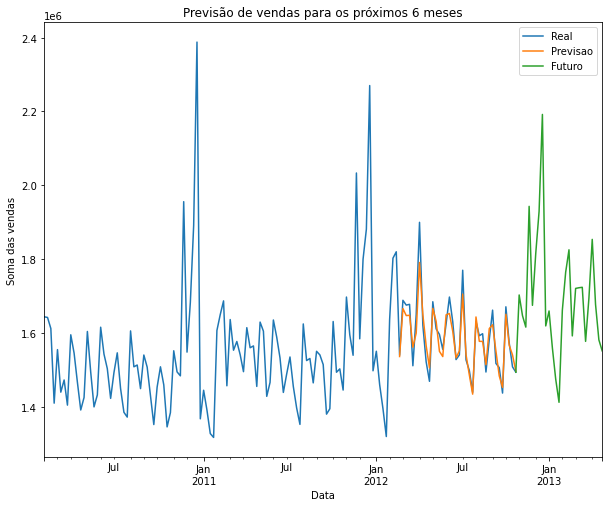

In [ ]:
# fig, ax = plt.subplots(figsize=(10,8))
# df_lojas_1.plot(x='data', y='vendas_soma', label='Real', ax=ax)
# X_test.plot(y='yhat', label='Previsao', ax=ax)
# resultados_1.plot(y='vendas_soma', label='Futuro', ax=ax)
# ax.set(title="Previsão de vendas para os próximos 6 meses",
#        xlabel="Data",
#        ylabel="Soma das vendas")
# plt.savefig("Previsao")
# plt.show()

In [ ]:
resultados

,loja,vendas_soma,preco_combustivel,IPC,taxa_desemprego,evento,tamanho,tipo_A,tipo_B,tipo_C,lag_1,lag_4,lag_51,lag_52,lag_53,rolling_mean_4,rolling_mean_51,rolling_mean_52,rolling_mean_53
2010-02-05,1,1.643691e+06,2.572,211.096358,8.106,0.0,97.622581,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-12,1,1.641957e+06,2.548,211.242170,8.106,1.0,97.622581,1,0,0,1.643691e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-19,1,1.611968e+06,2.514,211.289143,8.106,0.0,97.622581,1,0,0,1.641957e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-26,1,1.409728e+06,2.561,211.319643,8.106,0.0,97.622581,1,0,0,1.611968e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-05,1,1.554807e+06,2.625,211.350143,8.106,0.0,97.622581,1,0,0,1.409728e+06,1.643691e+06,NaN,NaN,NaN,1.576836e+06,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-29,45,8.033718e+05,3.784,193.442790,8.625,0.0,76.271613,0,1,0,8.045719e+05,8.004092e+05,899479.43,777254.06,791835.37,8.033728e+05,809455.310377,808836.055562,808515.287910
2013-04-05,45,8.677054e+05,3.763,193.516047,8.335,0.0,76.271613,0,1,0,8.033718e+05,8.032945e+05,781970.60,899479.43,777254.06,8.041134e+05,807570.846215,809338.318980,808732.955603
2013-04-12,45,8.167989e+05,3.724,193.589304,8.335,0.0,76.271613,0,1,0,8.677054e+05,8.052156e+05,776661.74,781970.60,899479.43,8.202162e+05,809251.920802,808727.280017,810439.584734
2013-04-19,45,8.028172e+05,3.676,193.589304,8.335,0.0,76.271613,0,1,0,8.167989e+05,8.045719e+05,711571.88,776661.74,781970.60,8.231120e+05,810038.922993,809397.054089,808879.573823


In [ ]:
resultados['tipo_de_loja']=resultados[['tipo_A','tipo_B','tipo_C']].dot(resultados[['tipo_A','tipo_B','tipo_C']].columns)
df_lojas['tipo_de_loja']=df_lojas[['tipo_A','tipo_B','tipo_C']].dot(df_lojas[['tipo_A','tipo_B','tipo_C']].columns)
X_lojas['yhat'] = rf_lojas.predict(X_lojas)
X_lojas['tipo_de_loja']=X_lojas[['tipo_A','tipo_B','tipo_C']].dot(X_lojas[['tipo_A','tipo_B','tipo_C']].columns)

In [ ]:
X_lojas['tipo_de_loja']=X_lojas[['tipo_A','tipo_B','tipo_C']].dot(X_lojas[['tipo_A','tipo_B','tipo_C']].columns)

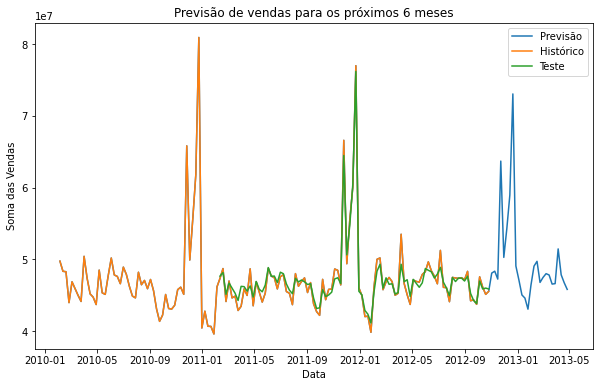

In [ ]:
prev_geral = resultados.groupby(resultados.index)[['vendas_soma']].sum()
lojas_geral = df_lojas.groupby(['data'])[['vendas_soma']].sum()
test_geral = X_lojas.groupby([X_lojas.index])[['yhat']].sum()
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(prev_geral['vendas_soma'], label='Previsão')
ax.plot(lojas_geral['vendas_soma'], label='Histórico')
ax.plot(test_geral['yhat'], label='Teste')
ax.set(title='Previsão de vendas para os próximos 6 meses',
       xlabel='Data',
       ylabel='Soma das Vendas')
plt.legend()
plt.savefig('previsao')
plt.show()

In [ ]:
from IPython.display import display
from ipywidgets import interact, IntSlider, SelectionSlider

def plot_res(loja):
    plot_filter = resultados[(resultados['loja']==loja)]
    plot_df_lojas = df_lojas[df_lojas['loja']==loja ]
    plot_X_lojas = X_lojas[X_lojas['loja']==loja]

    fig, ax = plt.subplots(figsize=(10,3))
    ax.plot(plot_filter['vendas_soma'], label='Previsão')
    ax.plot(plot_df_lojas['data'], plot_df_lojas['vendas_soma'], label='Histórico')
    ax.plot(plot_X_lojas['yhat'], label='Teste')
    plt.legend()
    plt.show()
# Criando o Slider interativo
_ = interact(plot_res,
             loja=IntSlider(min=df.loja.min(), max=df.loja.max(), step = 1, value = 22),
             )

interactive(children=(IntSlider(value=22, description='loja', max=45, min=1), Output()), _dom_classes=('widget…

In [ ]:
prev_tipo = resultados.groupby([resultados.index, 'tipo_de_loja'])['vendas_soma']\
                      .sum().reset_index()
prev_tipo.columns = ['data', 'tipo_de_loja', 'vendas_soma']
X_lojas_tipo = X_lojas.groupby([X_lojas.index, 'tipo_de_loja'])['yhat']\
                      .sum().reset_index()
X_lojas_tipo.columns = ['data', 'tipo_de_loja', 'vendas_soma']
df_lojas_tipo = df_lojas.groupby(['data', 'tipo_de_loja'])['vendas_soma']\
                      .sum().reset_index()
df_lojas_tipo.columns = ['data', 'tipo_de_loja', 'vendas_soma']

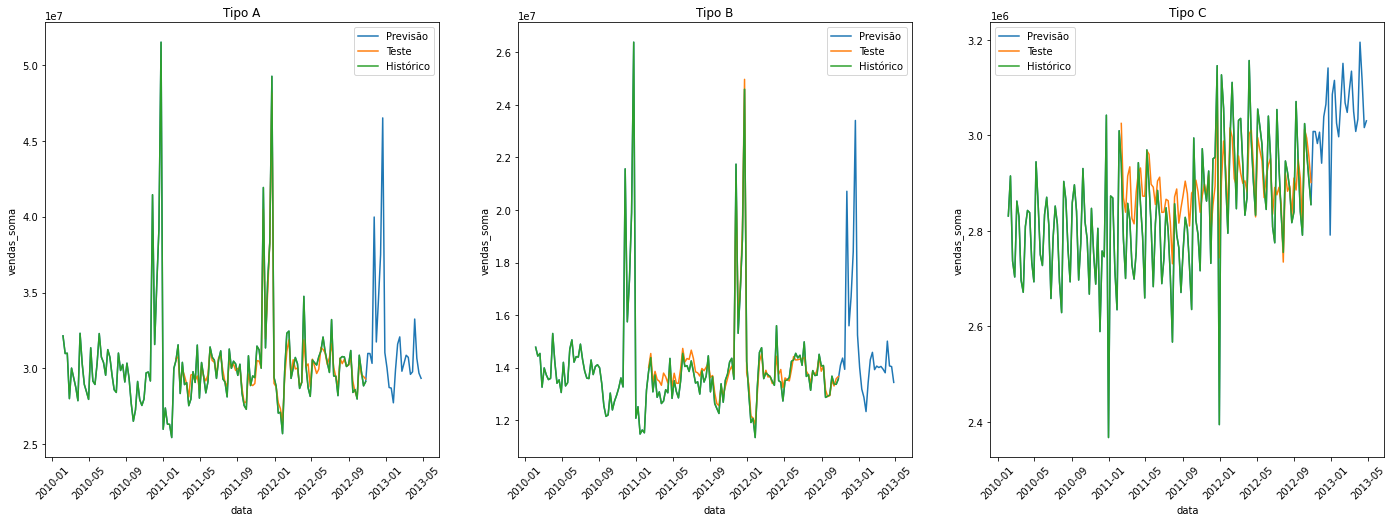

In [ ]:
fig, ax = plt.subplots(figsize=(24,8), ncols=3)
sns.lineplot(data=prev_tipo[prev_tipo['tipo_de_loja']=='tipo_A'], 
             x='data', y='vendas_soma',
             label='Previsão', ax=ax[0])
sns.lineplot(data=X_lojas_tipo[X_lojas_tipo['tipo_de_loja']=='tipo_A'], 
             x='data', y='vendas_soma', 
             label='Teste', ax=ax[0])
sns.lineplot(data=df_lojas_tipo[df_lojas_tipo['tipo_de_loja']=='tipo_A'], 
             x='data', y='vendas_soma', 
             label='Histórico', ax=ax[0])
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_title('Tipo A')

sns.lineplot(data=prev_tipo[prev_tipo['tipo_de_loja']=='tipo_B'], 
             x='data', y='vendas_soma',
             label='Previsão', ax=ax[1])
sns.lineplot(data=X_lojas_tipo[X_lojas_tipo['tipo_de_loja']=='tipo_B'], 
             x='data', y='vendas_soma', 
             label='Teste', ax=ax[1])
sns.lineplot(data=df_lojas_tipo[df_lojas_tipo['tipo_de_loja']=='tipo_B'], 
             x='data', y='vendas_soma', 
             label='Histórico', ax=ax[1])
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('Tipo B')

sns.lineplot(data=prev_tipo[prev_tipo['tipo_de_loja']=='tipo_C'], 
             x='data', y='vendas_soma',
             label='Previsão', ax=ax[2])
sns.lineplot(data=X_lojas_tipo[X_lojas_tipo['tipo_de_loja']=='tipo_C'], 
             x='data', y='vendas_soma', 
             label='Teste', ax=ax[2])
sns.lineplot(data=df_lojas_tipo[df_lojas_tipo['tipo_de_loja']=='tipo_C'], 
             x='data', y='vendas_soma', 
             label='Histórico', ax=ax[2])
ax[2].tick_params(axis='x', rotation=45)
ax[2].set_title('Tipo C')

plt.savefig('vendas_por_tipo_de_loja')
plt.show()

In [ ]:
resultados_por_tipo = resultados.groupby([resultados.index])['vendas_soma'].sum().reset_index()
df_lojas_por_tipo = df_lojas.groupby(['data'])['vendas_soma'].sum().reset_index()
X_test_por_tipo = X_test.groupby([X_test.index])['yhat'].sum().reset_index()
resultados_por_tipo.columns=['data','vendas_soma']
# resultados_por_tipo.set_index('data',inplace=True)
# df_lojas_por_tipo.set_index('data',inplace=True)
X_test_por_tipo.columns=['data', 'vendas_soma']
# X_test_por_tipo.set_index('data',inplace=True)

In [ ]:
# df_prev = get_features(df_lojas).drop('vendas_media', axis=1)
# df_final = pd.DataFrame(columns=df_prev.columns)
# data_prev_inicio = X_lojas.index.max() + timedelta(weeks = 1)
# data_prev_fim = X_lojas.index.max() + timedelta(weeks = 26)
# df_futuro = get_df_futuro(data_prev_inicio, data_prev_fim)
# df_futuro_loja_1 = df_futuro[df_futuro['loja']==1]
# df_prev_loja_1 = df_prev[df_prev['loja']==1]
# aux = df_futuro_loja_1[df_futuro_loja_1['data'] == data_prev_inicio].set_index('data')
# df_prev_loja_1 = pd.concat([df_prev_loja_1, aux]).reset_index()
# df_prev_loja_1
# df_prev_loja_1.rename(columns={'index': 'data'}, inplace=True)
# print(df_prev_loja_1.tail().to_markdown())
# # df_prev = get_features(df_prev_loja_1)
# # X_prev = df_prev[df_prev.index == data_prev_inicio].drop('vendas_soma', axis=1)
# # y_prev = rf_lojas.predict(X_prev)[0]
# # df_prev.loc[df_prev.index == data_prev_inicio, 'vendas_soma'] = y_prev
# # df_prev.tail()
# # pd.concat([df_final, df_prev])

In [ ]:
# # DataFrame com os dados para previsao
# df_prev = outras_var[(outras_var['data']<= X_lojas.)].copy()
# df_prev['evento'] = df_prev['evento'].astype('float')
# df_prev = pd.merge(df_prev, lojas, on='loja')
# df_prev = pd.concat([df_prev.drop('tipo_de_loja', axis=1), 
#                      pd.get_dummies(df_prev['tipo_de_loja'], prefix='tipo')], 
#                     axis=1)
# vendas_por_loja = vendas.groupby(['loja', 'data'], as_index=False)['venda_semanal'].sum()
# vendas_por_loja.columns = ['loja', 'data', 'vendas_soma']
# df_prev = pd.merge(df_prev, vendas_por_loja, on=['loja', 'data'], how='left')
# df_prev = get_features(df=df_prev)
# # df_prev = df_prev[df_prev.index >= data_prev_inicio]
# df_prev